## 파일 로드

In [6]:
train = pd.read_json('./raw_data/train.json')
val = pd.read_json('./raw_data/val.json')
song_meta = pd.read_json('./raw_data/song_meta.json')

In [15]:
song_tag = pd.read_csv('./raw_data/song_tags.csv')
song_tag.columns = ['id','tags']

## 노래와 tag를 merge

In [22]:
song_df = song_meta.merge(song_tag,on='id',how='outer')

In [203]:
song_df.head()

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id,tags
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0,"['비오는날', '드라이브', '비오는날', '추억', '회상']"
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1,NaN
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2,NaN
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3,"['1', '감성', '듣기좋은', '드라이브', 'Pop', '여행', '기분전환..."
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4,"['뉴에이지', '뉴에이지']"


In [204]:
train.sort_values(by='like_cnt',ascending=False)['like_cnt'].describe()

count    115071.000000
mean         95.197687
std         560.653757
min           0.000000
25%           2.000000
50%           7.000000
75%          24.000000
max       53211.000000
Name: like_cnt, dtype: float64

## 10이상 like를 받은 노래만 선택

In [193]:
tr_selected = train[train.sort_values(by='like_cnt',ascending=False)['like_cnt'] >10].reset_index(drop=True)

In [199]:
ls = []
for idx in tr_selected.index:
    for i in tr_selected.iloc[idx]['songs']:
        ls.append({
            "id" : i ,
            "like_cnt_from_plylist": tr_selected.iloc[idx]['like_cnt']
        })

In [201]:
id_like_cnt_df = pd.DataFrame(ls)
id_like_cnt_df

,id,like_cnt_from_plylist
0,525514,71
1,129701,71
2,383374,71
3,562083,71
4,297861,71
...,...,...
2782700,111365,17
2782701,51373,17
2782702,640239,17
2782703,13759,17


In [216]:
id_like_cnt_df_sum = id_like_cnt_df.groupby('id').agg(sum)
id_like_cnt_df_sum

,like_cnt_from_plylist
id,
0,27
3,1684
4,31
5,382
6,24
...,...
707972,233
707978,642
707979,72


In [222]:
df = song_meta.merge(id_like_cnt_df_sum,on='id')

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id,like_cnt_from_plylist
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0,27
1,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3,1684
2,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4,31
3,[GN1701],20100602,"Bye, Lupita",911754,[475840],Para Los Enamorados,[GN1700],"[Bye, Lupita]",5,382
4,"[GN1601, GN1602, GN1614]",20170208,Sibelius: Symphony No. 2; Tapiola; Valse triste,10038397,"[162097, 100237]",Sibelius : Valse Triste Op.44 (시벨리우스 : 슬픈 왈츠 작...,[GN1600],"[Herbert Blomstedt, San Francisco Symphony]",6,24
...,...,...,...,...,...,...,...,...,...,...
467982,[GN0901],20150728,"추억의 DJ들이 추천하는 7080 롤라장 댄스 베스트 (빌보드 빅히트 팝송댄스, 유...",2332003,[2727],Step By Step,[GN0900],[Various Artists],707972,233
467983,"[GN0908, GN0901]",20191025,My Blood,10343254,[100377],My Blood,[GN0900],[Westlife],707978,642
467984,[GN1701],19950000,Cantaloupe Island,305052,[28082],Driftin`,[GN1700],[Herbie Hancock],707979,72
467985,"[GN0401, GN0403]",20171202,Mirrorball,10116357,[924416],Mirrorball (Feat. YunB),[GN0400],[SUMIN (수민)],707980,22


# 모든 노래 playlist에서 온 like 갯수 붙이기

In [226]:
ls = []
for idx in train.index:
    for i in train.iloc[idx]['songs']:
        ls.append({
            "id" : i ,
            "like_cnt_from_plylist": train.iloc[idx]['like_cnt']
        })

In [227]:
id_like_cnt = pd.DataFrame(ls)
id_like_cnt

,id,like_cnt_from_plylist
0,525514,71
1,129701,71
2,383374,71
3,562083,71
4,297861,71
...,...,...
5285866,111365,17
5285867,51373,17
5285868,640239,17
5285869,13759,17


In [228]:
id_like_cnt_sum = id_like_cnt.groupby('id').agg(sum)
id_like_cnt_sum

,like_cnt_from_plylist
id,
0,29
3,1686
4,39
5,391
6,24
...,...
707984,2
707985,11
707986,1123


In [224]:
df[df['song_gn_gnr_basket'].apply(len) != 1]

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id,like_cnt_from_plylist
8,"[GN2704, GN1104, GN1103, GN1101]",20140728,Knock You Out (Remixes),2269860,[455705],Knock You Out,"[GN2700, GN1100]",[Bingo Players],14,1536
10,"[GN2503, GN0205, GN2501, GN2506, GN0201]",20160226,Melting,2669407,[750053],Girl Crush,"[GN2500, GN0200]",[마마무 (Mamamoo)],17,1040
12,"[GN0805, GN0501, GN0502, GN0801, GN0509]",20150205,내가 부른 그림 2,2303168,[230399],무얼 기다리나 (Feat. 조원선),"[GN0500, GN0800]",[이영훈],19,6907
18,"[GN2502, GN0205, GN2501, GN2506, GN1501, GN020...",20190519,A-TEEN2 Part.2,10286928,[861436],9-TEEN,"[GN2500, GN1500, GN0200]",[세븐틴],30,2039
22,"[GN0805, GN0501, GN0502, GN0801, GN0509]",20120629,남몰래 듣기,2133128,[681291],찾고 있니,"[GN0500, GN0800]",[이호석],35,76
...,...,...,...,...,...,...,...,...,...,...
467958,"[GN0901, GN0902, GN1001]",20130930,Days Are Gone,2203219,[688022],Falling,"[GN0900, GN1000]",[HAIM],707934,692
467965,"[GN2704, GN1104, GN1103, GN1101]",20140915,Drop That,2291968,"[729055, 791018]",Drop That (Combo! Remix),"[GN2700, GN1100]","[Will Sparks, Zoolanda]",707947,25
467967,"[GN2502, GN0205, GN2501, GN2506, GN0201]",20150409,One Great Step Returns Live,2313220,[476181],Cover Girl (OGS Returns Live Ver.),"[GN2500, GN0200]",[인피니트],707950,64
467972,"[GN2502, GN0204, GN2501, GN2506, GN0201]",20020329,Perfect Man,16192,[100078],Honesty,"[GN2500, GN0200]",[신화],707956,409


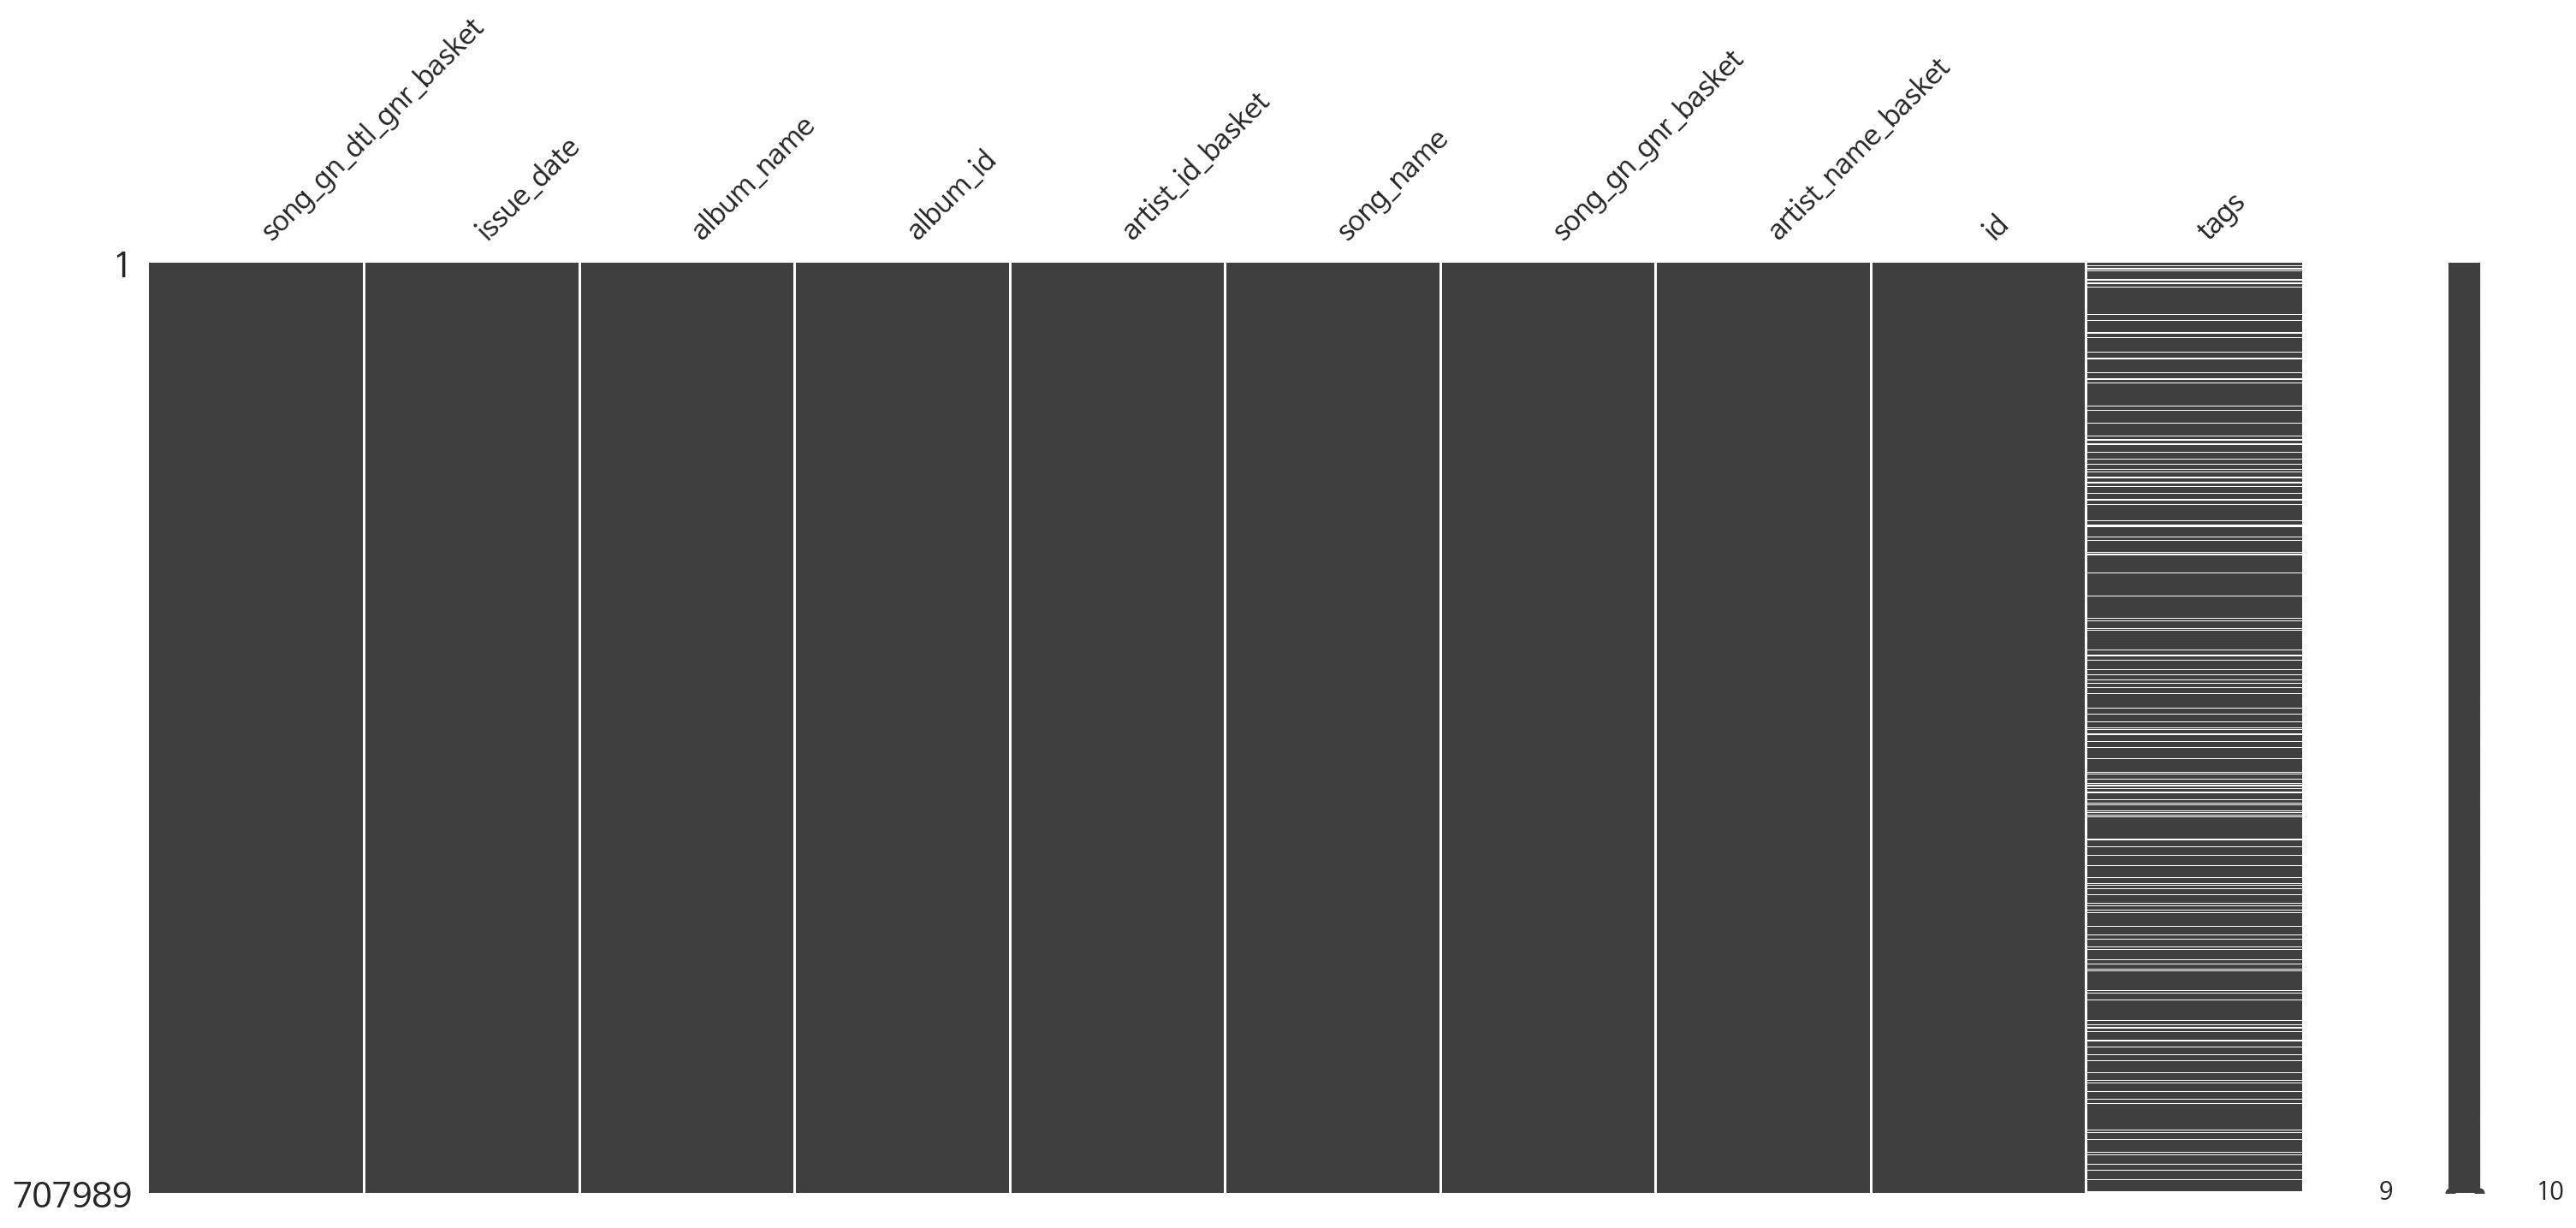

In [29]:
import missingno as msno
msno.matrix(song_df)